### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
import pickle
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
%matplotlib inline
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

### Reading Data Set

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Shape of Data

In [3]:
df.shape

(32581, 12)

### Columns and Data Types

In [4]:
data_types = pd.DataFrame(df.dtypes, columns = ['Data Type'])
data_types

,Data Type
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


### Missing Values

In [5]:
missing_values = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_values['Percentage'] = round(df.isna().mean() * 100, 2)
missing_values

,Missing Values,Percentage
person_age,0,0.00
person_income,0,0.00
person_home_ownership,0,0.00
person_emp_length,895,2.75
loan_intent,0,0.00
loan_grade,0,0.00
loan_amnt,0,0.00
loan_int_rate,3116,9.56
loan_status,0,0.00
loan_percent_income,0,0.00


### Details of Defaulters

In [6]:
default = df[df['loan_status'] == 1]
default.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


### Correlation Map

<AxesSubplot:>

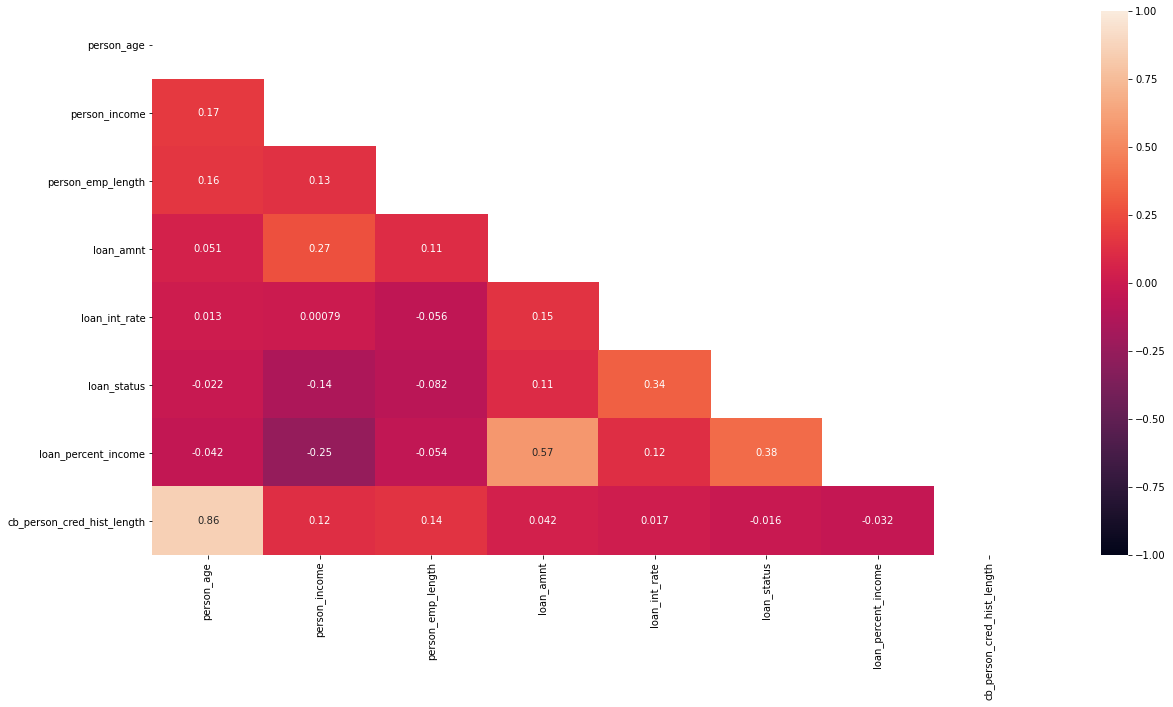

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.corr(), vmax = 1, vmin = -1, square = False, annot = True, mask = np.triu(df.corr()))

        An individual's credit history in years is highly proportional to his/her age.

### Number of Defaulters

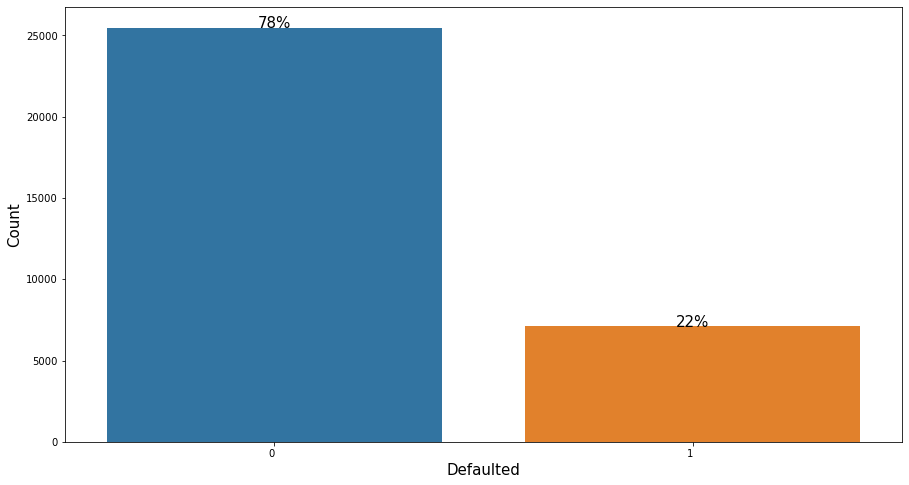

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = 'loan_status', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Defaulted', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

### 1. Person's Age

This column has 0 null values in entire data set


Text(0.5, 1.0, 'Age')

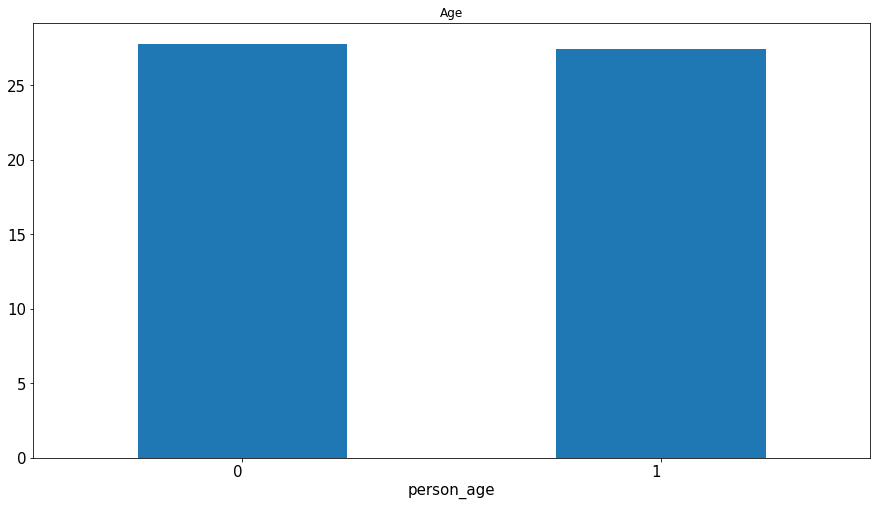

In [9]:
col = 'person_age'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby('loan_status')[col].mean().plot.bar()
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Age')

Text(0.5, 1.0, 'Distribution of Age')

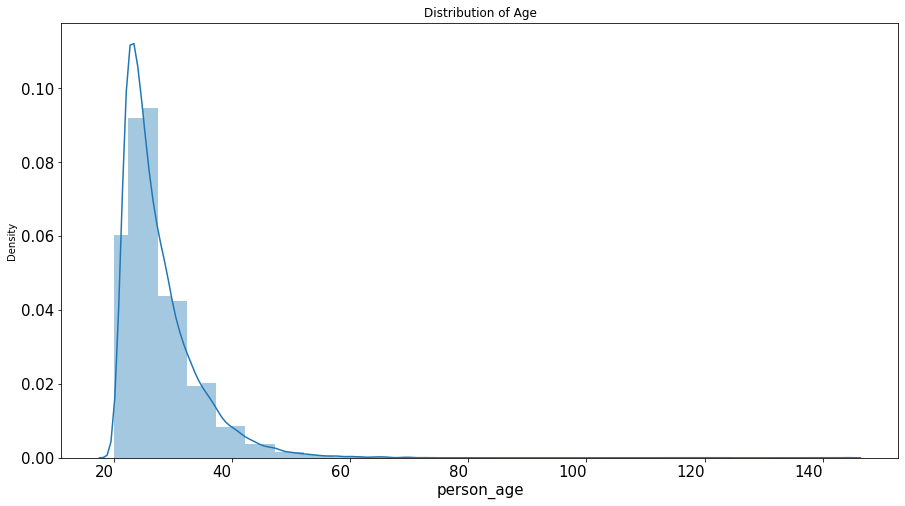

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col])
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Outliers in Age')

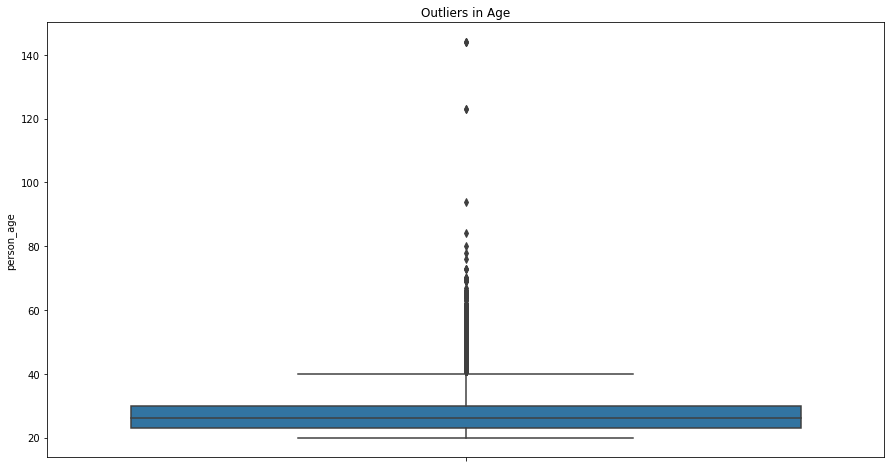

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y = df[col])
plt.title('Outliers in Age')

In [12]:
t_list = []
for i in df[col]:
    if i > (df[col].mean() + 2 * df[col].std()):
        t_list.append(df[col].mean() + 2 * df[col].std())
    elif i < (df[col].mean() - 2 * df[col].std()):
        t_list.append(df[col].mean() - 2 * df[col].std())
    else:
        t_list.append(i)
df[col] = t_list

### 2. Person's Income

This column has 0 null values in entire data set


Text(0.5, 1.0, 'Income')

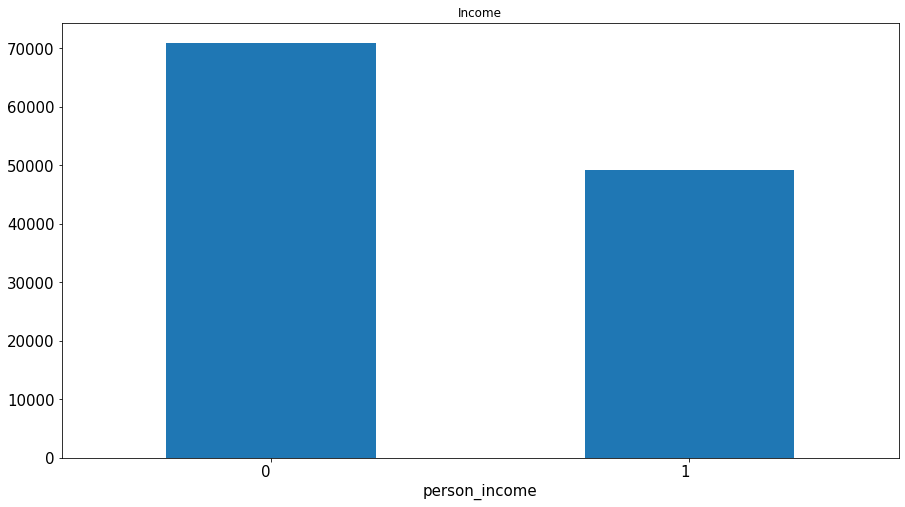

In [13]:
col = 'person_income'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby('loan_status')[col].mean().plot.bar()
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Income')

Text(0.5, 1.0, 'Distribution of Income')

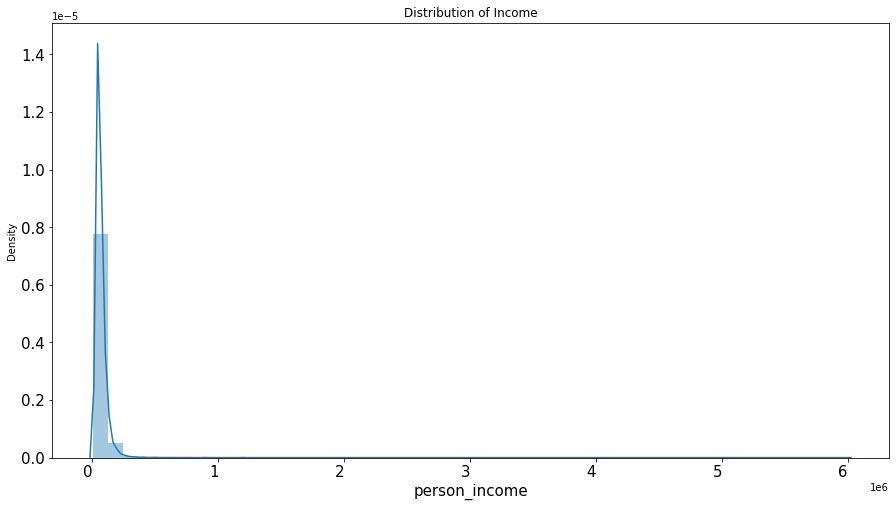

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col])
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Distribution of Income')

Text(0.5, 1.0, 'Outliers in Income')

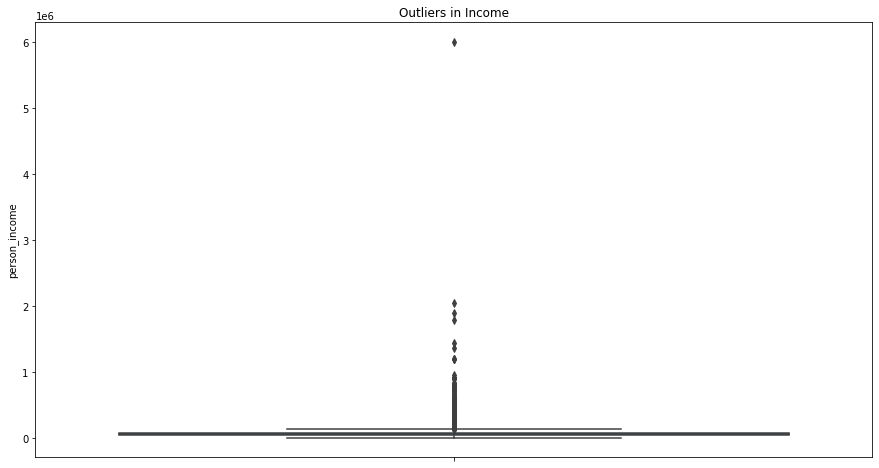

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y = df[col])
plt.title('Outliers in Income')

In [16]:
t_list = []
for i in df[col]:
    if i > (df[col].mean() + 2 * df[col].std()):
        t_list.append(df[col].mean() + 2 * df[col].std())
    elif i < (df[col].mean() - 2 * df[col].std()):
        t_list.append(df[col].mean() - 2 * df[col].std())
    else:
        t_list.append(i)
df[col] = t_list

### 3. Person's Home Ownership

This column has 0 null values in entire data set


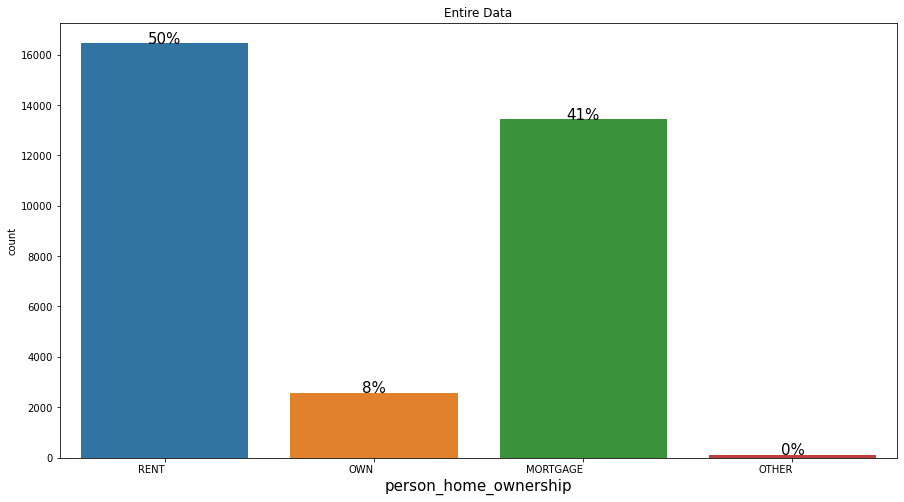

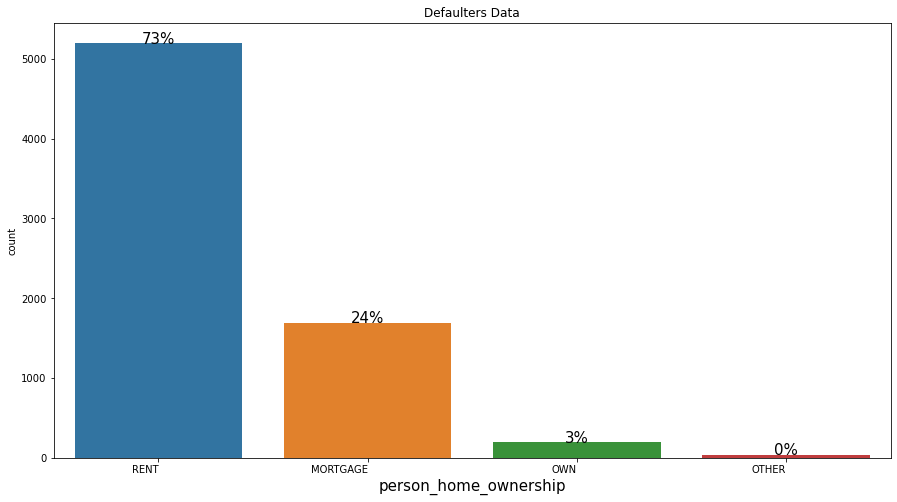

In [17]:
col = 'person_home_ownership'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = default)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Defaulters Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/default.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

### 4. Person's Employment Length

This column has 895 null values in entire data set


Text(0.5, 1.0, 'Employment Years')

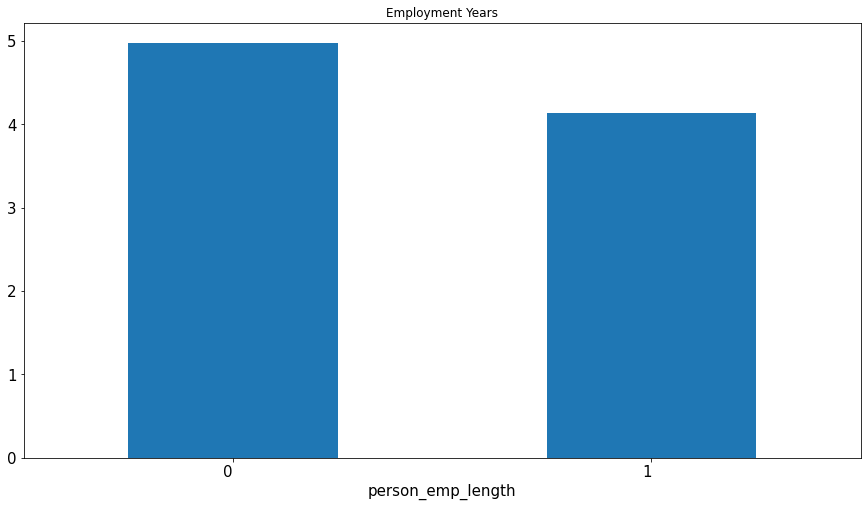

In [18]:
col = 'person_emp_length'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby('loan_status')[col].mean().plot.bar()
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Employment Years')

Text(0.5, 1.0, 'Distribution of Experience')

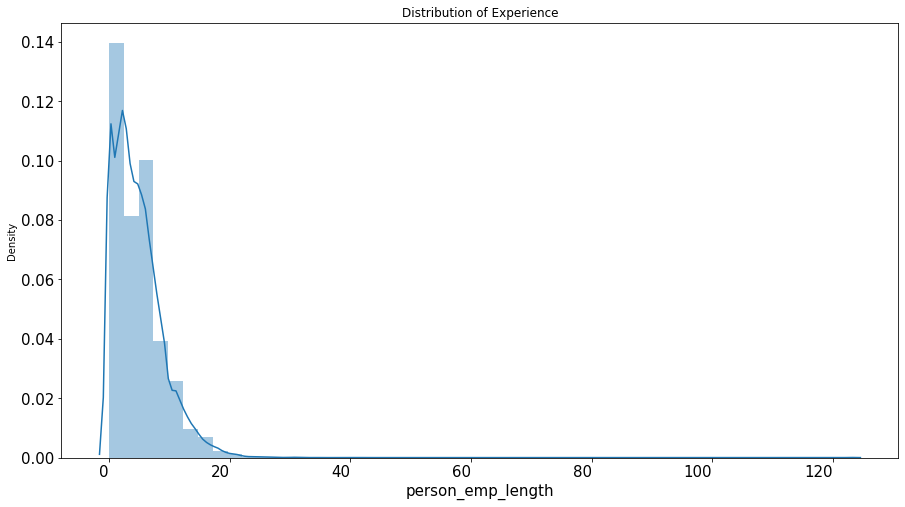

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col])
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Distribution of Experience')

Text(0.5, 1.0, 'Outliers in Experience')

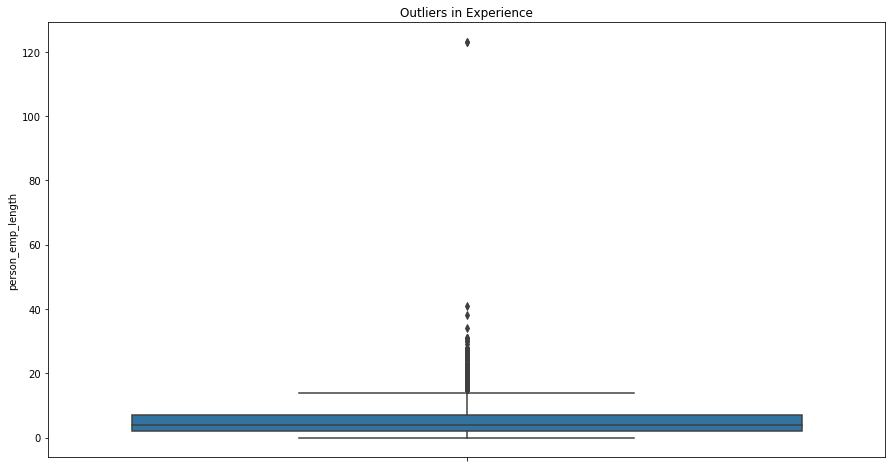

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y = df[col])
plt.title('Outliers in Experience')

In [21]:
t_list = []
for i in df[col]:
    if i > (df[col].mean() + 2 * df[col].std()):
        t_list.append(df[col].mean() + 2 * df[col].std())
    elif i < (df[col].mean() - 2 * df[col].std()):
        t_list.append(df[col].mean() - 2 * df[col].std())
    else:
        t_list.append(i)
df[col] = t_list

### 5. Loan Intent

This column has 0 null values in entire data set


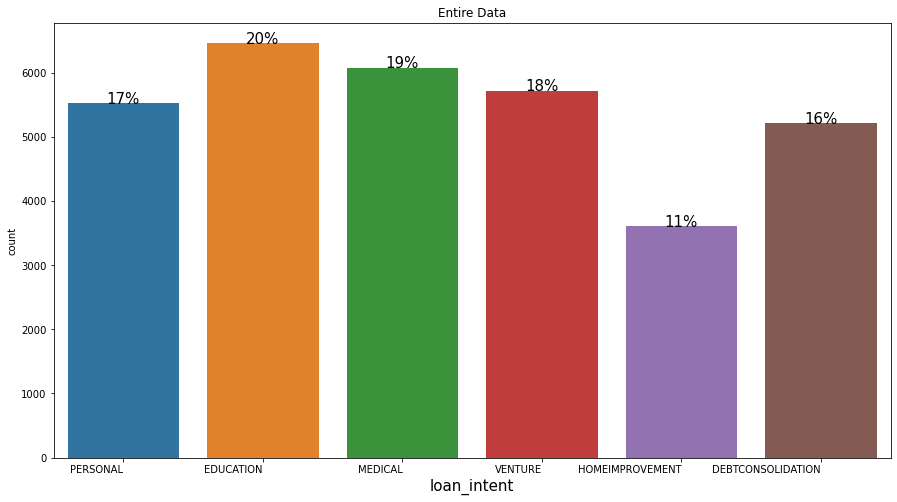

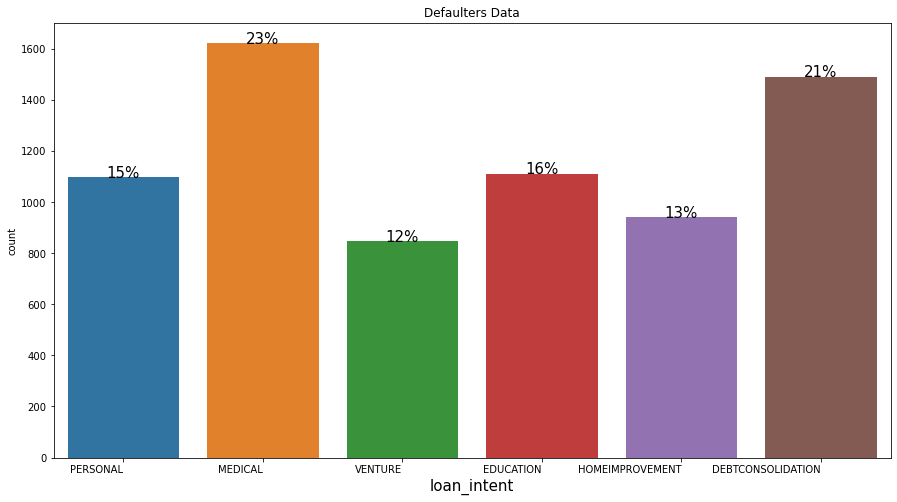

In [22]:
col = 'loan_intent'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = default)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Defaulters Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/default.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

### 6. Loan Grade

This column has 0 null values in entire data set


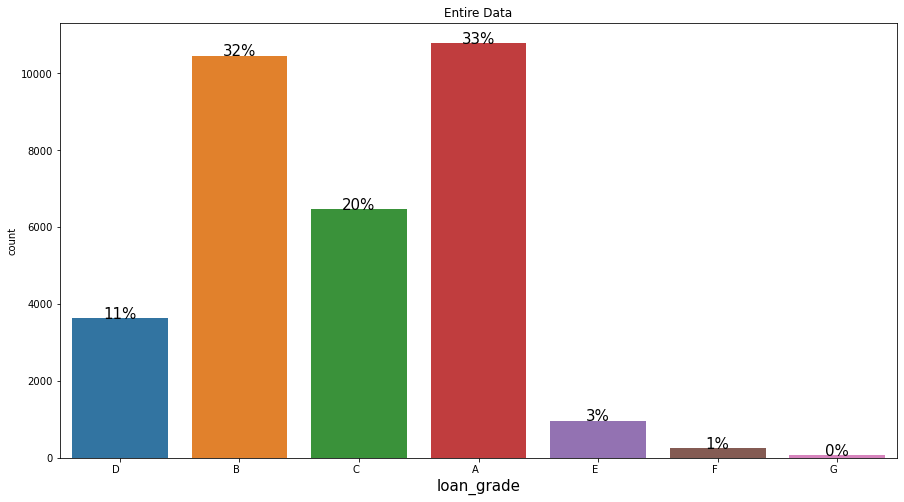

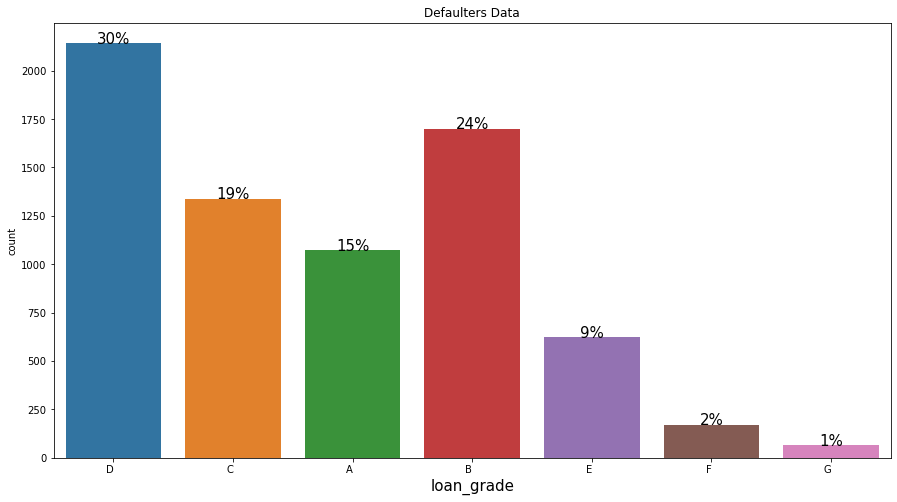

In [23]:
col = 'loan_grade'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = default)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Defaulters Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/default.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

### 7. Loan Amount

This column has 0 null values in entire data set


Text(0.5, 1.0, 'Loan Amount')

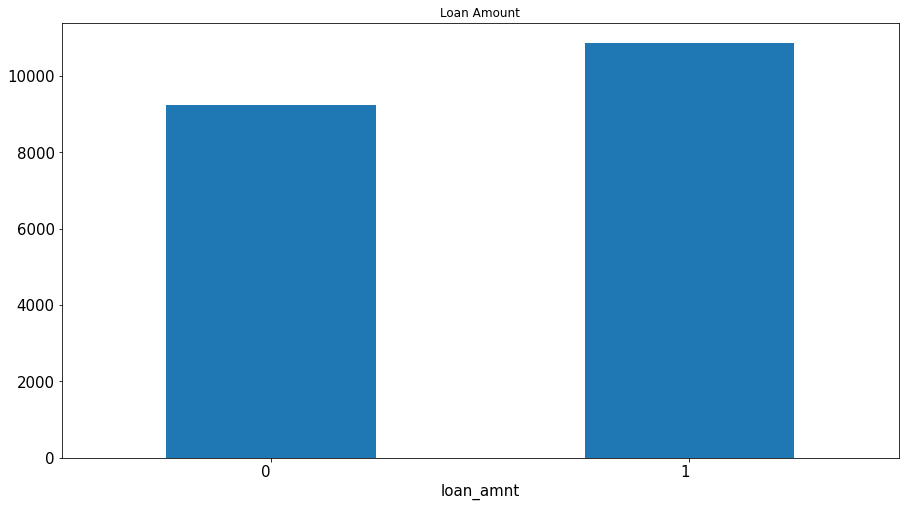

In [24]:
col = 'loan_amnt'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby('loan_status')[col].mean().plot.bar()
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Loan Amount')

Text(0.5, 1.0, 'Distribution of Amount')

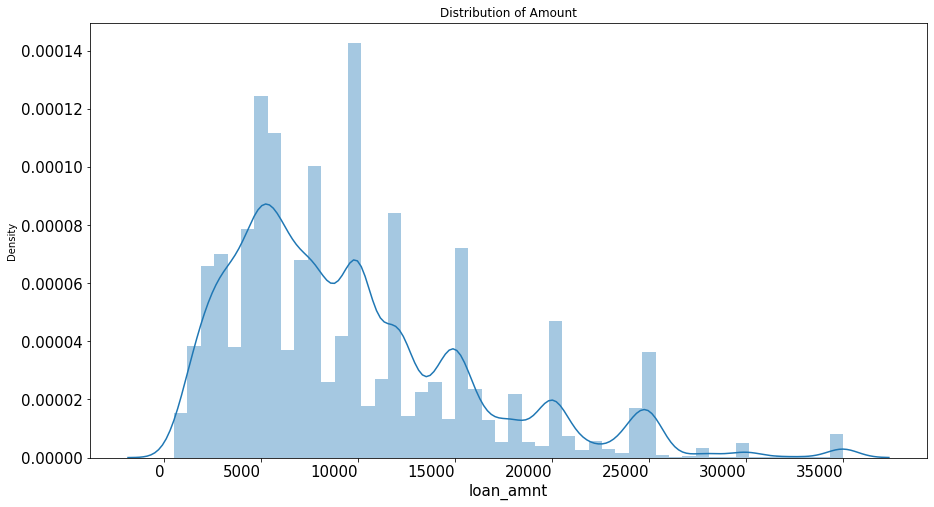

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col])
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Distribution of Amount')

Text(0.5, 1.0, 'Outliers in Amount')

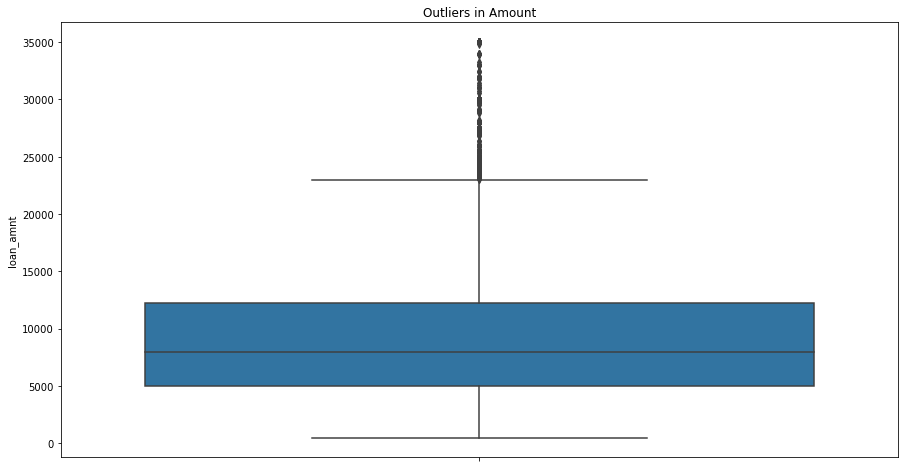

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y = df[col])
plt.title('Outliers in Amount')

In [27]:
t_list = []
for i in df[col]:
    if i > (df[col].mean() + 2 * df[col].std()):
        t_list.append(df[col].mean() + 2 * df[col].std())
    elif i < (df[col].mean() - 2 * df[col].std()):
        t_list.append(df[col].mean() - 2 * df[col].std())
    else:
        t_list.append(i)
df[col] = t_list

### 8. Interest Rate

This column has 3116 null values in entire data set


Text(0.5, 1.0, 'Interest Rate')

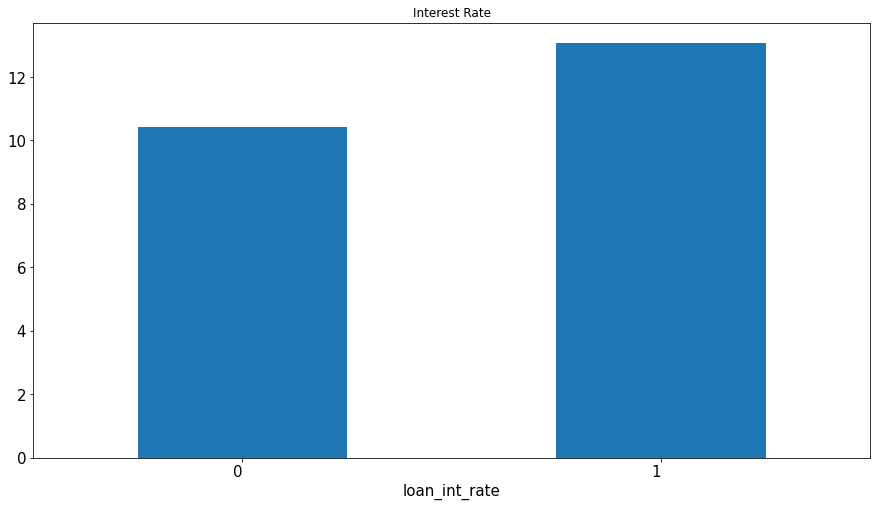

In [28]:
col = 'loan_int_rate'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby('loan_status')[col].mean().plot.bar()
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Interest Rate')

Text(0.5, 1.0, 'Distribution of Interest')

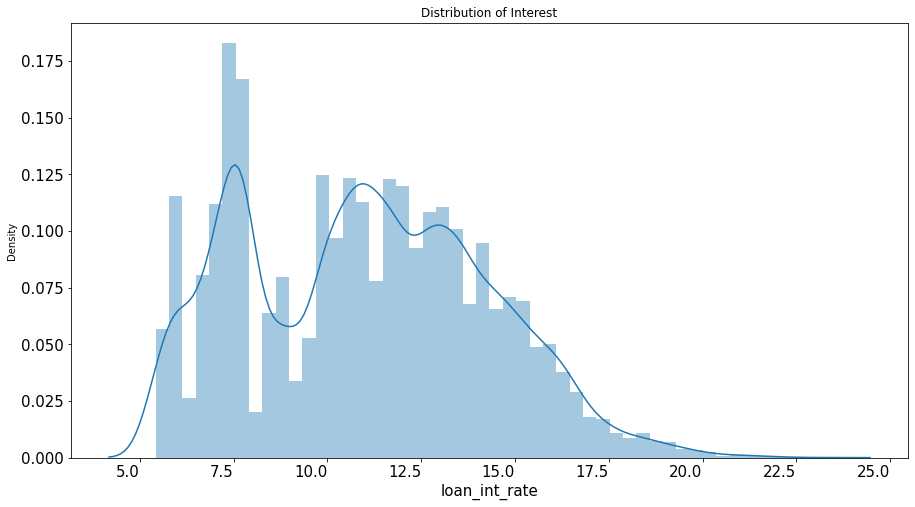

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col])
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Distribution of Interest')

Text(0.5, 1.0, 'Outliers in Interest')

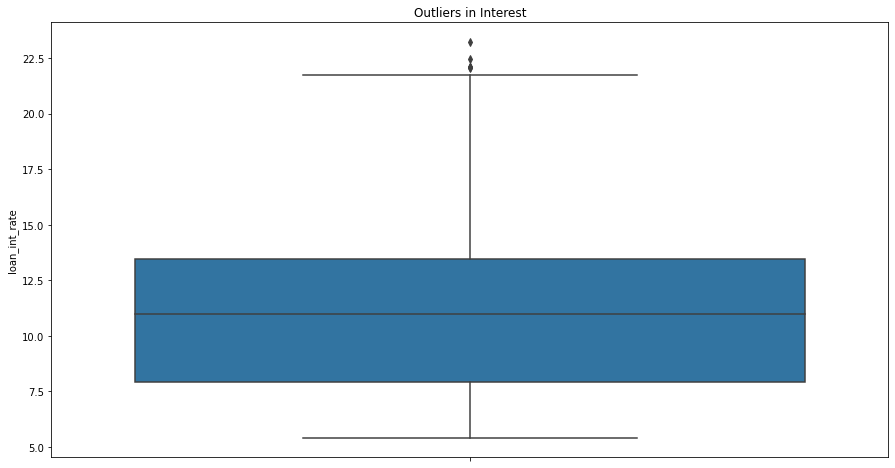

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y = df[col])
plt.title('Outliers in Interest')

In [31]:
t_list = []
for i in df[col]:
    if i > (df[col].mean() + 2 * df[col].std()):
        t_list.append(df[col].mean() + 2 * df[col].std())
    elif i < (df[col].mean() - 2 * df[col].std()):
        t_list.append(df[col].mean() - 2 * df[col].std())
    else:
        t_list.append(i)
df[col] = t_list

### 9. Loan Amount as Percentage of Income

This column has 0 null values in entire data set


Text(0.5, 1.0, 'Loan Amount as Percentage of Income')

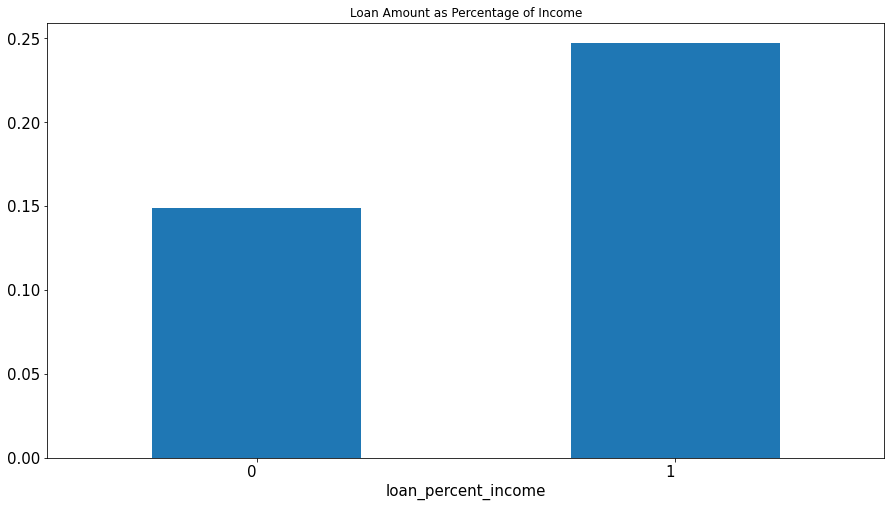

In [32]:
col = 'loan_percent_income'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby('loan_status')[col].mean().plot.bar()
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Loan Amount as Percentage of Income')

Text(0.5, 1.0, 'Distribution of Loan Amount as Percentage of Income')

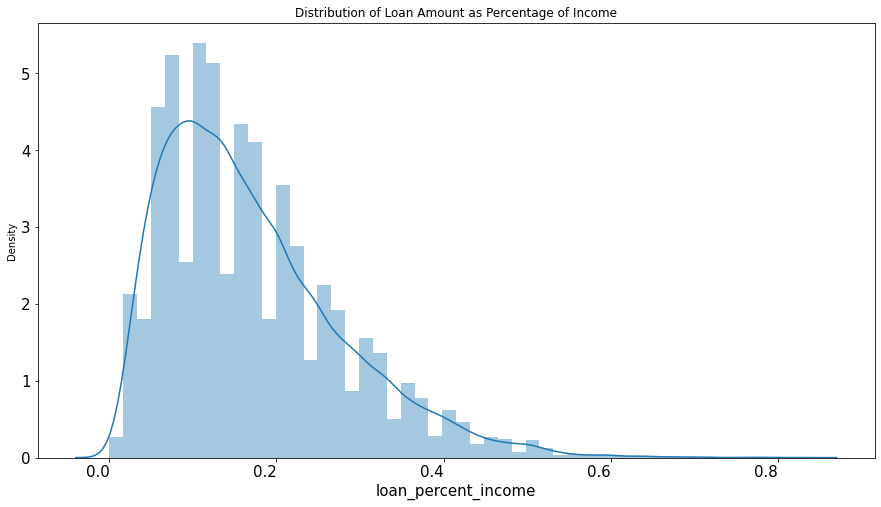

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col])
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Distribution of Loan Amount as Percentage of Income')

Text(0.5, 1.0, 'Outliers in Loan Amount as Percentage of Income')

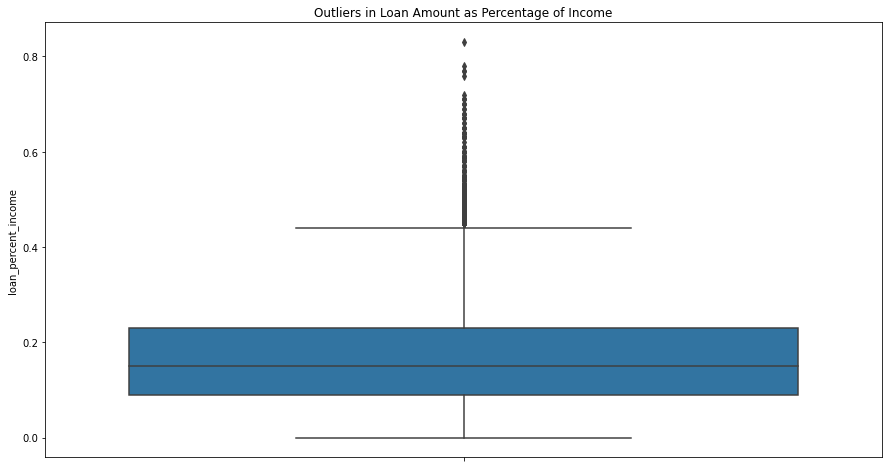

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y = df[col])
plt.title('Outliers in Loan Amount as Percentage of Income')

In [35]:
t_list = []
for i in df[col]:
    if i > (df[col].mean() + 2 * df[col].std()):
        t_list.append(df[col].mean() + 2 * df[col].std())
    elif i < (df[col].mean() - 2 * df[col].std()):
        t_list.append(df[col].mean() - 2 * df[col].std())
    else:
        t_list.append(i)
df[col] = t_list

### 10. Defaulted in Past?

This column has 0 null values in entire data set


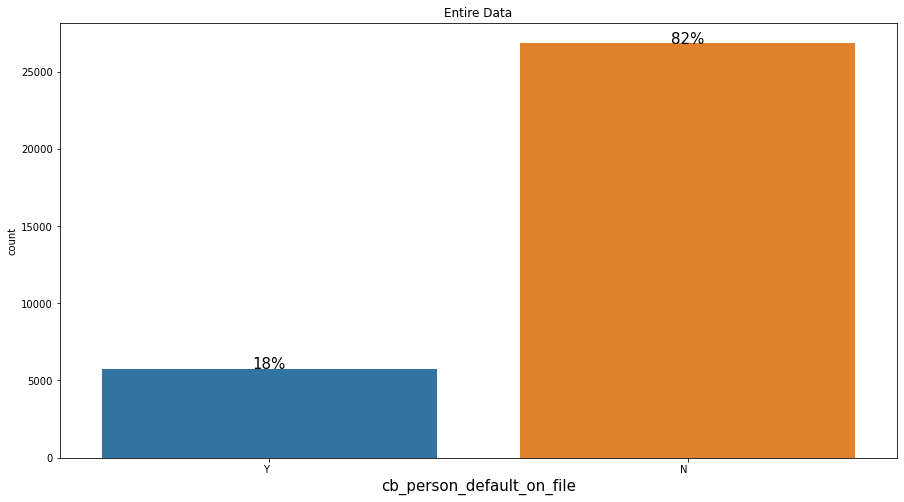

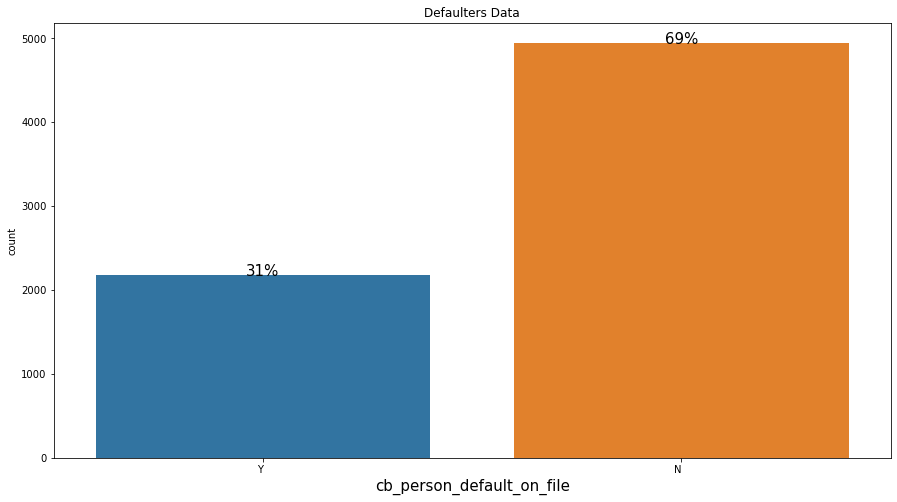

In [36]:
col = 'cb_person_default_on_file'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Entire Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/df.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = default)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel(col, fontsize = 15)
plt.title('Defaulters Data')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/default.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

### 11. Credit History Length

This column has 0 null values in entire data set


Text(0.5, 1.0, 'Credit History')

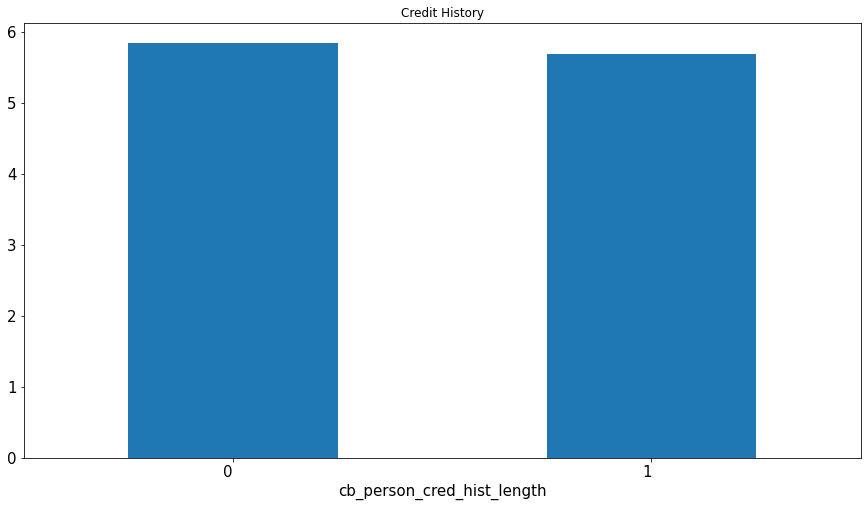

In [37]:
col = 'cb_person_cred_hist_length'
print('This column has {} null values in entire data set'.format(df[col].isna().sum()))
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby('loan_status')[col].mean().plot.bar()
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Credit History')

Text(0.5, 1.0, 'Distribution of Credit History Length')

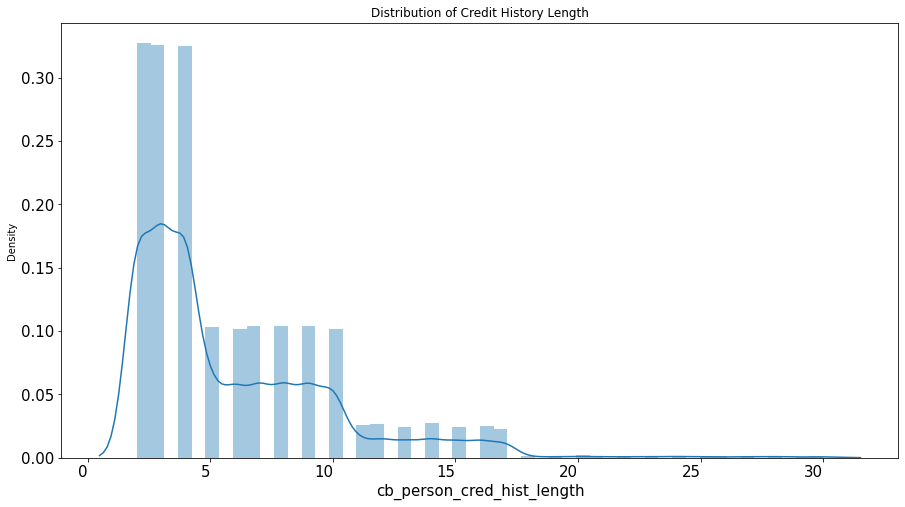

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(df[col])
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.title('Distribution of Credit History Length')

Text(0.5, 1.0, 'Outliers in Credit History Length')

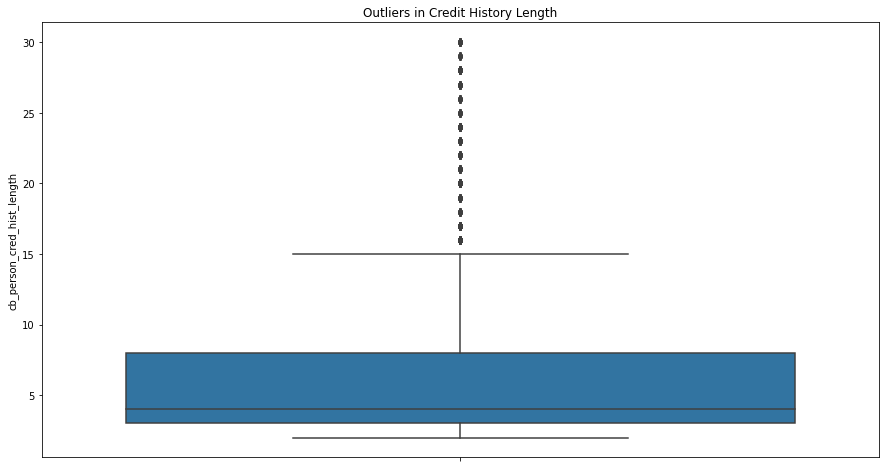

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y = df[col])
plt.title('Outliers in Credit History Length')

In [40]:
t_list = []
for i in df[col]:
    if i > (df[col].mean() + 2 * df[col].std()):
        t_list.append(df[col].mean() + 2 * df[col].std())
    elif i < (df[col].mean() - 2 * df[col].std()):
        t_list.append(df[col].mean() - 2 * df[col].std())
    else:
        t_list.append(i)
df[col] = t_list

### Handling Null Values

In [41]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df[['person_emp_length']])
df[['person_emp_length']] = imputer.transform(df[['person_emp_length']])
imputer.fit(df[['loan_int_rate']])
df[['loan_int_rate']] = imputer.transform(df[['loan_int_rate']])

### Encoding Categorical Variables

In [42]:
dummy = []
label = []
for i in df.columns:
    if df[i].dtypes == object:
        if df[i].nunique() > 2:
            dummy.append(i)
        else:
            label.append(i)

In [43]:
df_dummy = pd.get_dummies(df[dummy], prefix_sep = '_', drop_first = True)
df = df.drop(dummy, axis = 1)
df = pd.concat([df, df_dummy], axis = 1)
for i in label:
    df[i] = np.where(df[i] == 'Y', 1, 0)

### Train - Test Split

In [44]:
X = df.drop('loan_status', axis = 1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 17)

### Shapes of Train, Validation and Test Data

In [45]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((20851, 22), (5213, 22), (6517, 22), (20851,), (5213,), (6517,))

### Feature Selection

In [46]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
fi = pd.DataFrame(etc.feature_importances_, columns = ['Importance'], index = X_train.columns)
features = fi.sort_values(by = 'Importance', ascending = False).reset_index()
features

,index,Importance
0,loan_percent_income,0.218647
1,person_income,0.113352
2,loan_int_rate,0.089851
3,loan_amnt,0.081516
4,loan_grade_D,0.074336
5,person_home_ownership_RENT,0.070364
6,person_emp_length,0.069941
7,person_age,0.058000
8,cb_person_cred_hist_length,0.048752
9,loan_grade_E,0.021682


In [47]:
selected_features = []
for i in range(0, 10):
    selected_features.append(features['index'][i])

In [81]:
selected_features

['loan_percent_income',
 'person_income',
 'loan_int_rate',
 'loan_amnt',
 'loan_grade_D',
 'person_home_ownership_RENT',
 'person_emp_length',
 'person_age',
 'cb_person_cred_hist_length',
 'loan_grade_E']

In [48]:
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

### New Shapes of Train, Validation and Test Data Set with Selected Features

In [49]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((20851, 10), (5213, 10), (6517, 10), (20851,), (5213,), (6517,))

### LogisticRegression()

In [50]:
lr = LogisticRegression(verbose = 2)
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_val_pred_lr = lr.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [51]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_lr))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_lr))
print('Train f1_score: ', f1_score(y_train, y_train_pred_lr))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_lr))

Train accuracy:  0.8086902306843796
Validation accuracy:  0.8035680030692499
Train f1_score:  0.3010338181181006
Validation f1_score:  0.28291316526610644


### DecisionTreeClassifier()

In [52]:
dtc = DecisionTreeClassifier()
possible_parameter_values = {'criterion' : ['gini', 'entropy'],
                             'splitter' : ['best', 'random'],
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
dtc_rscv = RandomizedSearchCV(estimator = dtc, param_distributions = possible_parameter_values, cv = 10, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
dtc_rscv.fit(X_train, y_train)
dtc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.0s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, crit

[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.0s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.0s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.0s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.0s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.0s
[CV] splitter=random, min_samples_split=84,

[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   0.1s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   0.2s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   0.1s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   0.1s
[CV] splitter=best, min_samples_split=59, min_samples_leaf=16, max_depth=45, criterion=gini 
[CV]  splitter=best, min_samples_split=59, min_samples_leaf=16, max_depth=45, criterion=gini, total=   0.1s
[CV] splitter=best, min_samples_split=59, min_samples_leaf=16, max_

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


{'splitter': 'best',
 'min_samples_split': 79,
 'min_samples_leaf': 10,
 'max_depth': 60,
 'criterion': 'entropy'}

In [53]:
y_train_pred_dtc = dtc_rscv.predict(X_train)
y_val_pred_dtc = dtc_rscv.predict(X_val)

In [54]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_dtc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_dtc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_dtc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_dtc))

Train accuracy:  0.9095966620305981
Validation accuracy:  0.8902743142144638
Train f1_score:  0.7571815019966508
Validation f1_score:  0.7105263157894738


### RandomForestClassifier()

In [55]:
rfc = RandomForestClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                             'criterion' : ['gini', 'entropy'],
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
rfc_rscv = RandomizedSearchCV(estimator = rfc, param_distributions = possible_parameter_values, cv = 10, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
rfc_rscv.fit(X_train, y_train)
rfc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy, total=  21.2s
[CV] n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy, total=  20.8s
[CV] n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy 
[CV]  n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy, total=  22.5s
[CV] n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy 
[CV]  n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy, total=  21.1s
[CV] n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy 
[CV]  n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy, total=  20.9s
[CV] n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy 
[CV]  n_estimators=800, min_samples_split=93, min_samples_leaf=10, max_depth=65, criterion=entropy, total=  20.7s
[CV] n_estimators=800, min_samples

[CV]  n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini, total=   9.4s
[CV] n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini 
[CV]  n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini, total=   9.3s
[CV] n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini 
[CV]  n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini, total=   9.2s
[CV] n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini 
[CV]  n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini, total=   9.3s
[CV] n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini 
[CV]  n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_depth=30, criterion=gini, total=   9.2s
[CV] n_estimators=350, min_samples_split=25, min_samples_leaf=7, max_d

[CV]  n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy, total=   4.3s
[CV] n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy 
[CV]  n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy, total=   4.4s
[CV] n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy 
[CV]  n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy, total=   4.3s
[CV] n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy 
[CV]  n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy, total=   4.4s
[CV] n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy 
[CV]  n_estimators=150, min_samples_split=38, min_samples_leaf=8, max_depth=95, criterion=entropy, total=   4.3s
[CV] n_estimators=150, min_samples_split=38

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 21.7min finished


{'n_estimators': 500,
 'min_samples_split': 26,
 'min_samples_leaf': 5,
 'max_depth': 45,
 'criterion': 'gini'}

In [56]:
y_train_pred_rfc = rfc_rscv.predict(X_train)
y_val_pred_rfc = rfc_rscv.predict(X_val)

In [57]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_rfc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_rfc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_rfc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_rfc))

Train accuracy:  0.920963023356194
Validation accuracy:  0.8964128141185498
Train f1_score:  0.7858627858627859
Validation f1_score:  0.7202072538860104


### AdaBoostClassifier()

In [58]:
abc = AdaBoostClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
abc_rscv = RandomizedSearchCV(estimator = abc, param_distributions = possible_parameter_values, cv = 10, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
abc_rscv.fit(X_train, y_train)
abc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=200, learning_rate=0.544 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ n_estimators=200, learning_rate=0.544, total=   3.8s
[CV] n_estimators=200, learning_rate=0.544 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ............ n_estimators=200, learning_rate=0.544, total=   3.6s
[CV] n_estimators=200, learning_rate=0.544 ...........................
[CV] ............ n_estimators=200, learning_rate=0.544, total=   3.7s
[CV] n_estimators=200, learning_rate=0.544 ...........................
[CV] ............ n_estimators=200, learning_rate=0.544, total=   4.1s
[CV] n_estimators=200, learning_rate=0.544 ...........................
[CV] ............ n_estimators=200, learning_rate=0.544, total=   3.7s
[CV] n_estimators=200, learning_rate=0.544 ...........................
[CV] ............ n_estimators=200, learning_rate=0.544, total=   3.9s
[CV] n_estimators=200, learning_rate=0.544 ...........................
[CV] ............ n_estimators=200, learning_rate=0.544, total=   3.6s
[CV] n_estimators=200, learning_rate=0.544 ...........................
[CV] ............ n_estimators=200, learning_rate=0.544, total=   3.7s
[CV] n_estimators=200, learning_rate=0.544 ...........................
[CV] .

[CV] ............ n_estimators=250, learning_rate=0.229, total=   4.5s
[CV] n_estimators=650, learning_rate=0.713 ...........................
[CV] ............ n_estimators=650, learning_rate=0.713, total=  12.0s
[CV] n_estimators=650, learning_rate=0.713 ...........................
[CV] ............ n_estimators=650, learning_rate=0.713, total=  15.7s
[CV] n_estimators=650, learning_rate=0.713 ...........................
[CV] ............ n_estimators=650, learning_rate=0.713, total=  12.4s
[CV] n_estimators=650, learning_rate=0.713 ...........................
[CV] ............ n_estimators=650, learning_rate=0.713, total=  13.1s
[CV] n_estimators=650, learning_rate=0.713 ...........................
[CV] ............ n_estimators=650, learning_rate=0.713, total=  13.1s
[CV] n_estimators=650, learning_rate=0.713 ...........................
[CV] ............ n_estimators=650, learning_rate=0.713, total=  13.0s
[CV] n_estimators=650, learning_rate=0.713 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.1min finished


{'n_estimators': 500, 'learning_rate': 0.967}

In [59]:
y_train_pred_abc = abc_rscv.predict(X_train)
y_val_pred_abc = abc_rscv.predict(X_val)

In [60]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_abc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_abc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_abc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_abc))

Train accuracy:  0.8843700541940435
Validation accuracy:  0.8753117206982544
Train f1_score:  0.7052927514973719
Validation f1_score:  0.6878001921229586


### KNeighborsClassifier()

In [62]:
knc = KNeighborsClassifier()
possible_parameter_values = {'n_neighbors' : [int(x) for x in np.arange(start = 1, stop = 11, step = 1)],
                             'weights' : ['uniform', 'distance']}
knc_rscv = RandomizedSearchCV(estimator = knc, param_distributions = possible_parameter_values, cv = 10, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
knc_rscv.fit(X_train, y_train)
knc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] weights=uniform, n_neighbors=8 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... weights=uniform, n_neighbors=8, total=   0.4s
[CV] weights=uniform, n_neighbors=8 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................... weights=uniform, n_neighbors=8, total=   0.3s
[CV] weights=uniform, n_neighbors=8 ..................................
[CV] ................... weights=uniform, n_neighbors=8, total=   0.3s
[CV] weights=uniform, n_neighbors=8 ..................................
[CV] ................... weights=uniform, n_neighbors=8, total=   0.5s
[CV] weights=uniform, n_neighbors=8 ..................................
[CV] ................... weights=uniform, n_neighbors=8, total=   0.3s
[CV] weights=uniform, n_neighbors=8 ..................................
[CV] ................... weights=uniform, n_neighbors=8, total=   0.3s
[CV] weights=uniform, n_neighbors=8 ..................................
[CV] ................... weights=uniform, n_neighbors=8, total=   0.2s
[CV] weights=uniform, n_neighbors=8 ..................................
[CV] ................... weights=uniform, n_neighbors=8, total=   0.3s
[CV] weights=uniform, n_neighbors=8 ..................................
[CV] .

[CV] ................... weights=uniform, n_neighbors=5, total=   0.3s
[CV] weights=uniform, n_neighbors=7 ..................................
[CV] ................... weights=uniform, n_neighbors=7, total=   0.3s
[CV] weights=uniform, n_neighbors=7 ..................................
[CV] ................... weights=uniform, n_neighbors=7, total=   0.3s
[CV] weights=uniform, n_neighbors=7 ..................................
[CV] ................... weights=uniform, n_neighbors=7, total=   0.3s
[CV] weights=uniform, n_neighbors=7 ..................................
[CV] ................... weights=uniform, n_neighbors=7, total=   0.2s
[CV] weights=uniform, n_neighbors=7 ..................................
[CV] ................... weights=uniform, n_neighbors=7, total=   0.3s
[CV] weights=uniform, n_neighbors=7 ..................................
[CV] ................... weights=uniform, n_neighbors=7, total=   0.2s
[CV] weights=uniform, n_neighbors=7 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.3s finished


{'weights': 'distance', 'n_neighbors': 7}

In [63]:
y_train_pred_knc = knc_rscv.predict(X_train)
y_val_pred_knc = knc_rscv.predict(X_val)

In [64]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_knc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_knc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_knc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_knc))

Train accuracy:  1.0
Validation accuracy:  0.8371379244197199
Train f1_score:  1.0
Validation f1_score:  0.5997171145685997


### XGBClassifier()

In [65]:
xgbc = XGBClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)], 
                             'use_label_encoder' : [True, False], 
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)], 
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
xgbc_rscv = RandomizedSearchCV(estimator = xgbc, param_distributions = possible_parameter_values, cv = 10, scoring = 'accuracy', verbose = 2, random_state = 17, n_jobs = 1)
xgbc_rscv.fit(X_train, y_train)
xgbc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[20:37:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   3.0s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 
[20:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   2.6s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 
[20:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   2.3s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 
[20:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encode

[CV]  use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372, total=  23.6s
[CV] use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372 
[20:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372, total=  18.5s
[CV] use_label_encoder=True, n_estimators=200, max_depth=95, learning_rate=0.615 
[20:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_enc

[CV]  use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158, total=   3.2s
[CV] use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158 
[20:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158, total=   3.2s
[CV] use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158 
[20:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=Tr

[CV]  use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646, total=  16.6s
[CV] use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646 
[20:47:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646, total=  17.3s
[CV] use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646 
[20:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encode

[CV]  use_label_encoder=False, n_estimators=400, max_depth=75, learning_rate=0.36, total=  21.3s
[CV] use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449 
[20:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449, total=  10.2s
[CV] use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449 
[20:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encode

[CV]  use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375, total=  30.1s
[CV] use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375 
[20:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375, total=  31.5s
[CV] use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375 
[20:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encode

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 32.7min finished


{'use_label_encoder': True,
 'n_estimators': 750,
 'max_depth': 75,
 'learning_rate': 0.1}

In [66]:
y_train_pred_xgbc = xgbc_rscv.predict(X_train)
y_val_pred_xgbc = xgbc_rscv.predict(X_val)

In [67]:
print('Train accuracy: ', accuracy_score(y_train, y_train_pred_xgbc))
print('Validation accuracy: ', accuracy_score(y_val, y_val_pred_xgbc))
print('Train f1_score: ', f1_score(y_train, y_train_pred_xgbc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_xgbc))

Train accuracy:  1.0
Validation accuracy:  0.9012085171686169
Train f1_score:  1.0
Validation f1_score:  0.7541766109785204


### Evaluating the Consistency of the Model with LogisticRegression()

In [69]:
X = df[selected_features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_lr = LogisticRegression()
    test_model_lr.fit(X_train, y_train)
    y_train_pred_tlr = test_model_lr.predict(X_train)
    y_val_pred_tlr = test_model_lr.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tlr))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tlr))
    f1_train.append(f1_score(y_train, y_train_pred_tlr))
    f1_val.append(f1_score(y_val, y_val_pred_tlr))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

,Train Accuracy,Validation Accuracy,Train f1,Validation f1,Difference(Accuracy),Difference(f1)
0,0.805813,0.808172,0.281200,0.291785,0.292774,3.764093
1,0.807614,0.795493,0.272501,0.287385,1.500868,5.462213
2,0.807029,0.804856,0.263233,0.254296,0.269291,3.395338
3,0.804871,0.822780,0.275982,0.301329,2.225061,9.184467
4,0.800703,0.824356,0.266379,0.311927,2.954080,17.098661
5,0.805328,0.802693,0.310881,0.290526,0.327154,6.547368
6,0.805855,0.806876,0.324634,0.326531,0.126689,0.584234
7,0.806038,0.817017,0.335423,0.358974,1.362089,7.021328
8,0.808407,0.796571,0.344423,0.315385,1.464086,8.430944
9,0.809439,0.805714,0.346012,0.352381,0.460121,1.840594


### Evaluating the Consistency of the Model with DecisionTreeClassifier()

In [70]:
X = df[selected_features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_dtc = DecisionTreeClassifier(splitter = 'random', min_samples_split = 29, min_samples_leaf = 38, max_depth = 35, criterion = 'gini')
    test_model_dtc.fit(X_train, y_train)
    y_train_pred_tdtc = test_model_dtc.predict(X_train)
    y_val_pred_tdtc = test_model_dtc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tdtc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tdtc))
    f1_train.append(f1_score(y_train, y_train_pred_tdtc))
    f1_val.append(f1_score(y_val, y_val_pred_tdtc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

,Train Accuracy,Validation Accuracy,Train f1,Validation f1,Difference(Accuracy),Difference(f1)
0,0.889262,0.887781,0.690938,0.690967,0.166583,0.004114
1,0.884412,0.880844,0.683415,0.689956,0.403494,0.957089
2,0.883318,0.883993,0.678770,0.673968,0.076355,0.707513
3,0.884684,0.877108,0.684763,0.684008,0.856386,0.110318
4,0.884309,0.884778,0.673496,0.663934,0.052966,1.419746
5,0.879537,0.863583,0.654927,0.597582,1.813946,8.755880
6,0.880878,0.875640,0.656101,0.591346,0.594660,9.869705
7,0.875801,0.870082,0.675821,0.674312,0.652912,0.223279
8,0.871890,0.884571,0.643312,0.657627,1.454453,2.225206
9,0.870576,0.885714,0.639442,0.696970,1.738926,8.996507


### Evaluating the Consistency of the Model with RandomForestClassifier()

In [71]:
X = df[selected_features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_rfc = RandomForestClassifier(n_estimators = 500, min_samples_split = 26, min_samples_leaf = 5, max_depth = 45, criterion = 'gini')
    test_model_rfc.fit(X_train, y_train)
    y_train_pred_trfc = test_model_rfc.predict(X_train)
    y_val_pred_trfc = test_model_rfc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_trfc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_trfc))
    f1_train.append(f1_score(y_train, y_train_pred_trfc))
    f1_val.append(f1_score(y_val, y_val_pred_trfc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

,Train Accuracy,Validation Accuracy,Train f1,Validation f1,Difference(Accuracy),Difference(f1)
0,0.921443,0.899674,0.785377,0.734113,2.362461,6.527371
1,0.920264,0.901223,0.783810,0.724230,2.069087,7.601316
2,0.921987,0.905875,0.791090,0.731624,1.747541,7.516944
3,0.918970,0.900712,0.784343,0.725957,1.986755,7.443999
4,0.916511,0.902576,0.777535,0.736709,1.520378,5.250726
5,0.917008,0.896370,0.775268,0.726430,2.250599,6.299485
6,0.917475,0.901975,0.780962,0.729839,1.689388,6.546150
7,0.912397,0.907594,0.769970,0.739018,0.526448,4.019882
8,0.914498,0.880000,0.773656,0.705882,3.772358,8.760216
9,0.913479,0.897143,0.771698,0.714286,1.788314,7.439749


### Evaluating the Consistency of the Model with AdaBoostClassifier()

In [72]:
X = df[selected_features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_abc = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.544)
    test_model_abc.fit(X_train, y_train)
    y_train_pred_tabc = test_model_abc.predict(X_train)
    y_val_pred_tabc = test_model_abc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tabc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tabc))
    f1_train.append(f1_score(y_train, y_train_pred_tabc))
    f1_val.append(f1_score(y_val, y_val_pred_tabc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

,Train Accuracy,Validation Accuracy,Train f1,Validation f1,Difference(Accuracy),Difference(f1)
0,0.880485,0.874736,0.697573,0.687410,0.652948,1.456847
1,0.879496,0.878926,0.692567,0.695966,0.064865,0.490892
2,0.878972,0.874101,0.691735,0.682300,0.554182,1.364036
3,0.881218,0.866991,0.691484,0.678733,1.614404,1.844027
4,0.881967,0.880094,0.691743,0.687042,0.212427,0.679668
5,0.879098,0.871194,0.687358,0.654088,0.899101,4.840274
6,0.880878,0.869056,0.695652,0.652427,1.342068,6.213592
7,0.884492,0.880146,0.705882,0.697460,0.491337,1.193226
8,0.883615,0.872000,0.706983,0.656442,1.314434,7.148926
9,0.879156,0.907143,0.692727,0.763636,3.183350,10.236220


### Evaluating the Consistency of the Model with KNeighborsClassifier()

In [73]:
X = df[selected_features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_knc = KNeighborsClassifier(weights = 'uniform', n_neighbors = 2)
    test_model_knc.fit(X_train, y_train)
    y_train_pred_tknc = test_model_knc.predict(X_train)
    y_val_pred_tknc = test_model_knc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_tknc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_tknc))
    f1_train.append(f1_score(y_train, y_train_pred_tknc))
    f1_val.append(f1_score(y_val, y_val_pred_tknc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

,Train Accuracy,Validation Accuracy,Train f1,Validation f1,Difference(Accuracy),Difference(f1)
0,0.902786,0.835220,0.714708,0.500872,7.484250,29.919405
1,0.899940,0.823304,0.705072,0.454478,8.515710,35.541556
2,0.897107,0.824640,0.692497,0.496124,8.077855,28.357251
3,0.896393,0.817535,0.689675,0.448471,8.797341,34.973512
4,0.895433,0.825293,0.691324,0.427035,7.833137,38.229339
5,0.890662,0.819672,0.674510,0.448029,7.970419,33.577144
6,0.890027,0.809802,0.674607,0.424779,9.013762,37.033196
7,0.888381,0.811528,0.662983,0.449198,8.650875,32.245989
8,0.889620,0.781714,0.657194,0.356902,12.129384,45.692966
9,0.893815,0.798571,0.667413,0.394850,10.655829,40.838782


### Evaluating the Consistency of the Model with XGBoostClassifier()

In [74]:
X = df[selected_features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)
accuracy_train = []
accuracy_val = []
f1_train = []
f1_val = []
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = rs)
    test_model_xgbc = XGBClassifier(use_label_encoder = False, n_estimators = 50, max_depth = 35, learning_rate = 0.737)
    test_model_xgbc.fit(X_train, y_train)
    y_train_pred_txgbc = test_model_xgbc.predict(X_train)
    y_val_pred_txgbc = test_model_xgbc.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_txgbc))
    accuracy_val.append(accuracy_score(y_val, y_val_pred_txgbc))
    f1_train.append(f1_score(y_train, y_train_pred_txgbc))
    f1_val.append(f1_score(y_val, y_val_pred_txgbc))
data = {'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val, 'Train f1' : f1_train, 'Validation f1' : f1_val}
data = pd.DataFrame(data)
data['Difference(Accuracy)'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data

[21:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Train Accuracy,Validation Accuracy,Train f1,Validation f1,Difference(Accuracy),Difference(f1)
0,0.999952,0.902359,0.999891,0.751828,9.759724,24.808953
1,0.999940,0.902182,0.999864,0.743073,9.776418,25.682616
2,0.999925,0.889988,0.999827,0.742817,10.994529,25.705439
3,1.000000,0.903709,1.000000,0.745796,9.629075,25.420376
4,1.000000,0.891335,1.000000,0.719128,10.866511,28.087167
5,1.000000,0.885831,1.000000,0.727273,11.416862,27.272727
6,1.000000,0.895391,1.000000,0.725528,10.460863,27.447217
7,1.000000,0.889296,1.000000,0.704156,11.070448,29.584352
8,1.000000,0.900571,1.000000,0.735562,9.942857,26.443769
9,1.000000,0.880000,1.000000,0.693431,12.000000,30.656934


### KMeans()

In [75]:
X = df[selected_features]
y = df['loan_status']
kmc = KMeans(n_clusters = 2)
kmc.fit_predict(X)
X['cluster'] = pd.Series(kmc.labels_)

In [76]:
print('Accuracy: ', accuracy_score(y, X['cluster']))
print('f1_score: ', f1_score(y, X['cluster']))

Accuracy:  0.39829962247935913
f1_score:  0.3962426855558978


### Final Prediction

In [77]:
prediction = test_model_rfc.predict(X_test)
prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
print('Test accuracy: ', accuracy_score(y_test, prediction))
print('Test f1 score: ', f1_score(y_test, prediction))

Test accuracy:  0.8962712904710757
Test f1 score:  0.7145270270270271


### Exporting Predictions to CSV

In [79]:
prediction = pd.DataFrame((prediction))
prediction.to_csv('Prediction.csv')

### Pickle

In [80]:
file = open(r'C:\\Users\\Brajesh Mohapatra\\Python\\Probability of Default Prediction\\probability_default_prediction.pkl', 'wb')
pickle.dump(test_model_rfc, file)